In [6]:
%load_ext autoreload
%autoreload 1
%aimport mllib.helpers, mllib.plotters, mllib.loaders

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mllib.loaders import read_experiment_results

# Part 1 - Neural Network Training 

In [267]:
nn_rhc = read_experiment_results(
    directory='NN_OUTPUT',
    prefix='RHC_LOG_BALANCED',
    suffix='.txt',
    param_names=[]
)
nn_sa = read_experiment_results(
    directory='NN_OUTPUT',
    prefix='SA',
    suffix='_LOG.txt',
    param_names=['cooling']
)
nn_ga = read_experiment_results(
    directory='NN_OUTPUT',
    prefix='GA_',
    suffix='_LOG.txt',
    param_names=['pop', 'mate', 'mutate']
)
nn_bp = read_experiment_results(
    directory='NN_OUTPUT',
    prefix='BACKPROP_LOG',
    suffix='.txt',
    param_names=[]
)

In [130]:
nn_rhc.columns

Index(['iteration', 'MSE_trg', 'MSE_val', 'MSE_tst', 'acc_trg', 'acc_val',
       'acc_tst', 'elapsed'],
      dtype='object')

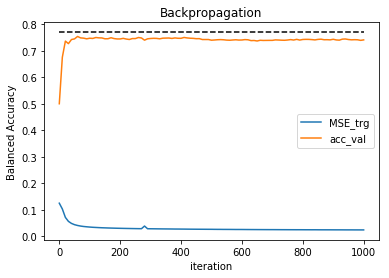

In [278]:
nn_bp.set_index(keys='iteration')[['MSE_trg', 'acc_val']].plot(title='Backpropagation')
plt.ylabel('Balanced Accuracy')
plt.hlines(0.77, 0, 1000, linestyles='--')
plt.legend(loc='right')

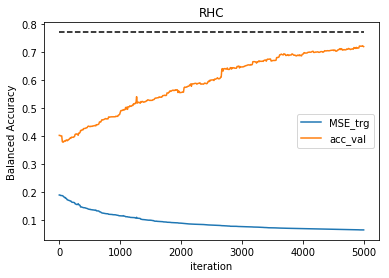

In [264]:
nn_rhc.set_index(keys='iteration')[['MSE_trg', 'acc_val']].plot(title='RHC')
plt.ylabel('Balanced Accuracy')
plt.hlines(0.77, 0, 5000, linestyles='--')
plt.legend(loc='right')

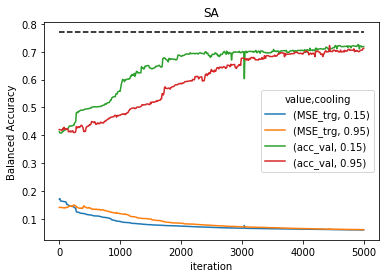

In [262]:
idx = pd.IndexSlice
nn_sa.columns.set_names('value', inplace=True)
nn_sa.set_index(keys=['iteration', 'cooling']).loc[idx[:,[0.15, 0.95]], :].unstack()[['MSE_trg', 'acc_val']].plot(title='SA')
plt.ylabel('Balanced Accuracy')
plt.hlines(0.77, 0, 5000, linestyles='--')

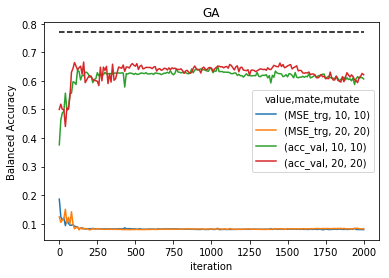

In [261]:
idx = pd.IndexSlice
nn_ga.columns.set_names('value', inplace=True)
# nn_ga = nn_ga.set_index(keys=['iteration', 'mate', 'mutate'])
nn_ga[nn_ga.index.droplevel(0).isin([(10,10), (20,20)])].unstack(level=[1,2])[['MSE_trg', 'acc_val']].plot(title='GA')
plt.ylabel('Balanced Accuracy')
plt.hlines(0.77, 0, 2000, linestyles='--')

In [273]:
print('RHC', nn_rhc[['acc_trg', 'acc_val', 'acc_tst']].max(), sep='\n')
print('SA', nn_sa[['acc_trg', 'acc_val', 'acc_tst']].max(), sep='\n')
print('GA', nn_ga[['acc_trg', 'acc_val', 'acc_tst']].max(), sep='\n')
print('Backprop', nn_bp[['acc_trg', 'acc_val', 'acc_tst']].max(), sep='\n')

RHC
acc_trg    0.736090
acc_val    0.721703
acc_tst    0.723056
dtype: float64
SA
acc_trg    0.747387
acc_val    0.736107
acc_tst    0.732224
dtype: float64
GA
acc_trg    0.681815
acc_val    0.673295
acc_tst    0.681415
dtype: float64
Backprop
acc_trg    0.901460
acc_val    0.754076
acc_tst    0.749136
dtype: float64


In [276]:
print((nn_rhc['elapsed']/nn_rhc['iteration']).tail(1),
(nn_sa['elapsed']/nn_sa['iteration']).tail(1),
(nn_ga['elapsed']/nn_ga['iteration']).tail(1),
(nn_bp['elapsed']/nn_bp['iteration']).tail(1), sep='\n')

500    1.882032
dtype: float64
500    1.617593
dtype: float64
200    56.678222
dtype: float64
100    8.787005
dtype: float64


# Part 2 - Optimization Problems

In [244]:
# T=15
cp_rhc = read_experiment_results(
    directory='CONTPEAKS',
    prefix='CONTPEAKS_T15_RHC_',
    suffix='_LOG.txt',
    param_names=['trial']
)
cp_sa = read_experiment_results(
    directory='CONTPEAKS',
    prefix='CONTPEAKS_T15_SA',
    suffix='_LOG.txt',
    param_names=['cooling', 'trial']
)
cp_ga = read_experiment_results(
    directory='CONTPEAKS',
    prefix='CONTPEAKS_T15_GA',
    suffix='_LOG.txt',
    param_names=['pop', 'mate', 'mutate', 'trial']
)
cp_mimic = read_experiment_results(
    directory='CONTPEAKS',
    prefix='CONTPEAKS_T15_MIMIC',
    suffix='_LOG.txt',
    param_names=['samples', 'keep', 'm', 'trial']
)

In [63]:
tsp_rhc = read_experiment_results(
    directory='TSP',
    prefix='TSP_RHC_',
    suffix='_LOG.txt',
    param_names=['trial']
)
tsp_sa = read_experiment_results(
    directory='TSP',
    prefix='TSP_SA',
    suffix='_LOG.txt',
    param_names=['cooling', 'trial']
)
tsp_ga = read_experiment_results(
    directory='TSP',
    prefix='TSP_GA',
    suffix='_LOG.txt',
    param_names=['pop', 'mate', 'mutate', 'trial']
)
tsp_mimic = read_experiment_results(
    directory='TSP',
    prefix='TSP_MIMIC',
    suffix='_LOG.txt',
    param_names=['samples', 'keep', 'm', 'trial']
)

In [66]:
ff_rhc = read_experiment_results(
    directory='FLIPFLOP',
    prefix='FLIPFLOP_RHC_',
    suffix='_LOG.txt',
    param_names=['trial']
)
ff_sa = read_experiment_results(
    directory='FLIPFLOP',
    prefix='FLIPFLOP_SA',
    suffix='_LOG.txt',
    param_names=['cooling', 'trial']
)
ff_ga = read_experiment_results(
    directory='FLIPFLOP',
    prefix='FLIPFLOP_GA',
    suffix='_LOG.txt',
    param_names=['pop', 'mate', 'mutate', 'trial']
)
ff_mimic = read_experiment_results(
    directory='FLIPFLOP',
    prefix='FLIPFLOP_MIMIC',
    suffix='_LOG.txt',
    param_names=['samples', 'keep', 'm', 'trial']
)

In [121]:
ks_rhc = read_experiment_results(
    directory='KNAPSACK',
    prefix='KNAPSACK_RHC_',
    suffix='_LOG.txt',
    param_names=['trial']
)
ks_sa = read_experiment_results(
    directory='KNAPSACK',
    prefix='KNAPSACK_SA',
    suffix='_LOG.txt',
    param_names=['cooling', 'trial']
)
ks_ga = read_experiment_results(
    directory='KNAPSACK',
    prefix='KNAPSACK_GA',
    suffix='_LOG.txt',
    param_names=['pop', 'mate', 'mutate', 'trial']
)
ks_mimic = read_experiment_results(
    directory='KNAPSACK',
    prefix='KNAPSACK_MIMIC',
    suffix='_LOG.txt',
    param_names=['samples', 'keep', 'm', 'trial']
)

### CP - highlights advantages of GA

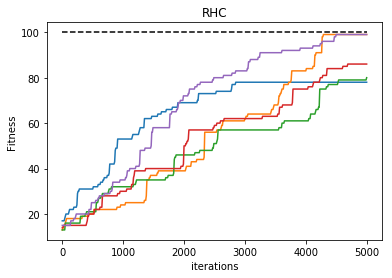

In [219]:
idx = pd.IndexSlice
cp_rhc.columns.set_names('value', inplace=True)
cp_rhc.set_index(keys=['iterations', 'trial']).unstack()[['fitness']].plot(legend=False, title='RHC')
plt.ylabel('Fitness')
plt.hlines(100, 0, 5000, linestyles='--')

In [207]:
np.unique(cp_sa['cooling'])

array([ 0.15,  0.35,  0.55,  0.75,  0.95])

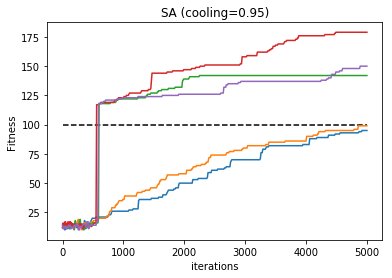

In [255]:
idx = pd.IndexSlice
cp_sa.columns.set_names('value', inplace=True)
cp_sa.set_index(keys=['iterations', 'trial', 'cooling']).xs(0.95, level='cooling').unstack()[['fitness']].plot(legend=False, title='SA (cooling=0.95)')
plt.ylabel('Fitness')
plt.hlines(100, 0, 5000, linestyles='--')

In [220]:
print(np.unique(cp_ga['mate']))
print(np.unique(cp_ga['mutate']))

[10 30 50]
[10 30 50]


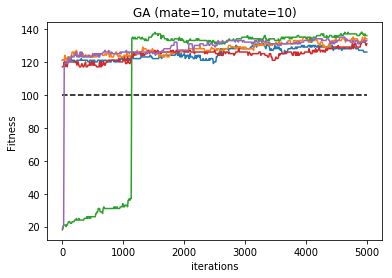

In [242]:
idx = pd.IndexSlice
cp_ga.columns.set_names('value', inplace=True)
cp_ga.set_index(keys=['iterations', 'trial', 'mate', 'mutate']).xs((10,10), level=('mate', 'mutate')).unstack()[['fitness']].plot(legend=False, title='GA (mate=10, mutate=10)')
plt.ylabel('Fitness')
plt.hlines(100, 0, 5000, linestyles='--')

In [231]:
print(np.unique(cp_mimic['keep']))
print(np.unique(cp_mimic['samples']))
print(np.unique(cp_mimic['m']))

[50]
[100]
[ 0.1  0.3  0.5  0.7  0.9]


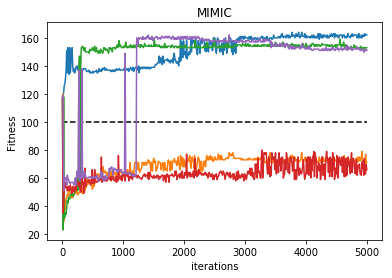

In [254]:
idx = pd.IndexSlice
cp_mimic.columns.set_names('value', inplace=True)
cp_mimic.set_index(keys=['iterations', 'm',  'trial']).xs(.9, level=('m')).unstack()[['fitness']].plot(legend=False, title='MIMIC')
plt.ylabel('Fitness')
plt.hlines(100, 0, 5000, linestyles='--')

### TSP - highlights advantages of SA

#### TSP

GA beats SA on this problem, but it can be argued that SA runs faster. With proper tuning and a different neighbor function, perhaps SA could do better.

Text(0,0.5,'Fitness')

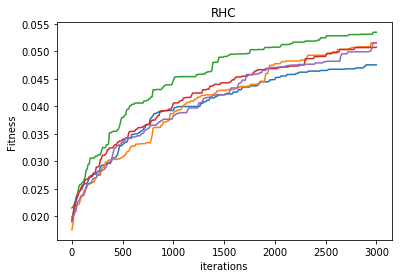

In [296]:
idx = pd.IndexSlice
tsp_rhc.columns.set_names('value', inplace=True)
tsp_rhc.set_index(keys=['iterations', 'trial']).unstack()[['fitness']].plot(legend=False, title='RHC')
plt.ylabel('Fitness')

In [297]:
np.unique(tsp_sa['cooling'])

array([ 0.15,  0.35,  0.55,  0.75,  0.95])

Text(0,0.5,'Fitness')

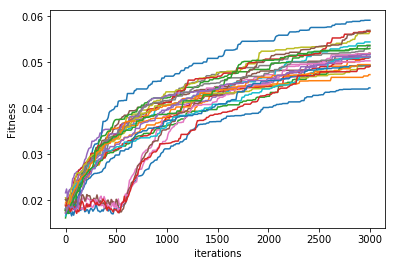

In [331]:
idx = pd.IndexSlice
tsp_sa.columns.set_names('value', inplace=True)
tsp_sa.set_index(keys=['iterations', 'trial', 'cooling']).unstack(level=[1,2])[['fitness']].plot(legend=False)
plt.ylabel('Fitness')

In [315]:
tsp_sa.columns

Index(['iterations', 'fitness', 'time', 'fevals', 'cooling', 'trial'], dtype='object', name='value')

In [299]:
print(np.unique(tsp_ga['mate']))
print(np.unique(tsp_ga['mutate']))

[10 30 50]
[10 30 50]


Text(0,0.5,'Fitness')

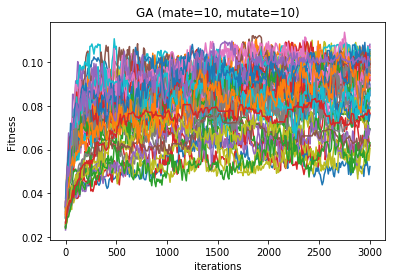

In [312]:
idx = pd.IndexSlice
tsp_ga.columns.set_names('value', inplace=True)
tsp_ga.set_index(keys=['iterations', 'trial', 'mate', 'mutate']).unstack(level=[1,2,3])[['fitness']].plot(legend=False, title='GA (mate=10, mutate=10)')
plt.ylabel('Fitness')

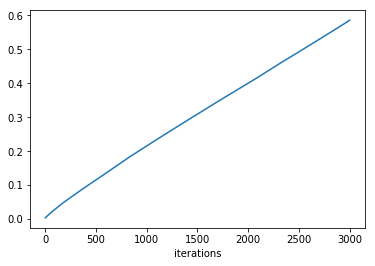

In [328]:
tsp_ga.groupby(by='iterations').aggregate(np.mean)['time'].plot()

Text(0,0.5,'Fitness')

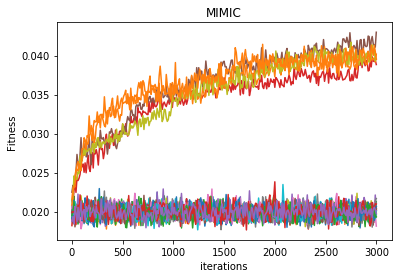

In [310]:
idx = pd.IndexSlice
tsp_mimic.columns.set_names('value', inplace=True)
tsp_mimic.set_index(keys=['iterations', 'm',  'trial']).unstack(level=[1,2])[['fitness']].plot(legend=False, title='MIMIC')
plt.ylabel('Fitness')

### Flip Flop (binary coloring) - highlights advantages of MIMIC

Text(0,0.5,'Fitness')

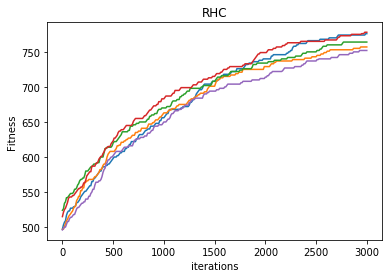

In [289]:
idx = pd.IndexSlice
ff_rhc.columns.set_names('value', inplace=True)
ff_rhc.set_index(keys=['iterations', 'trial']).unstack()[['fitness']].plot(legend=False, title='RHC')
plt.ylabel('Fitness')

In [280]:
np.unique(ff_sa['cooling'])

array([ 0.15,  0.35,  0.55,  0.75,  0.95])

Text(0,0.5,'Fitness')

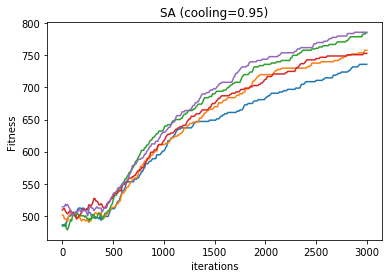

In [288]:
idx = pd.IndexSlice
ff_sa.columns.set_names('value', inplace=True)
ff_sa.set_index(keys=['iterations', 'trial', 'cooling']).xs(0.95, level='cooling').unstack()[['fitness']].plot(legend=False, title='SA (cooling=0.95)')
plt.ylabel('Fitness')

In [282]:
print(np.unique(ff_ga['mate']))
print(np.unique(ff_ga['mutate']))

[10 30 50]
[10 30 50]


Text(0,0.5,'Fitness')

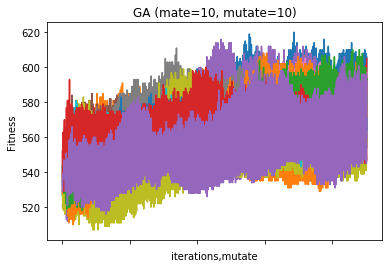

In [332]:
idx = pd.IndexSlice
ff_ga.columns.set_names('value', inplace=True)
ff_ga.set_index(keys=['iterations', 'trial', 'mate', 'mutate']).unstack(level=[1,2])[['fitness']].plot(legend=False, title='GA (mate=10, mutate=10)')
plt.ylabel('Fitness')

Text(0,0.5,'Fitness')

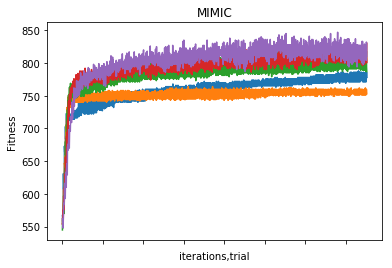

In [333]:
idx = pd.IndexSlice
ff_mimic.columns.set_names('value', inplace=True)
ff_mimic.set_index(keys=['iterations', 'm',  'trial']).unstack(level=1)[['fitness']].plot(legend=False, title='MIMIC')
plt.ylabel('Fitness')